In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
iris = sns.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


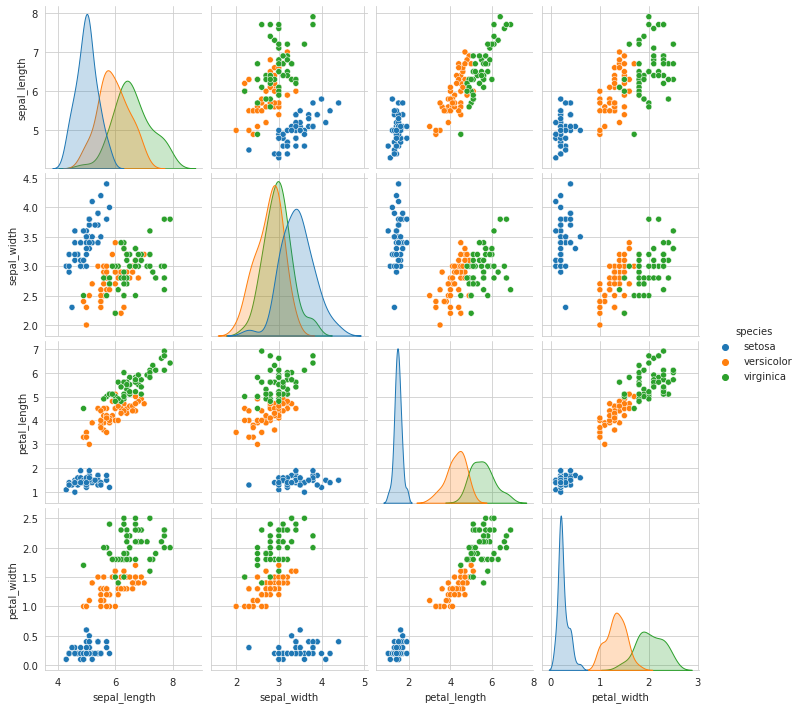

In [7]:
sns.color_palette("Spectral")
sns.pairplot(data=iris, hue='species')

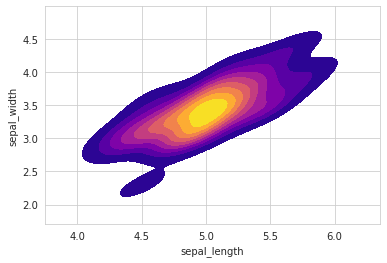

In [12]:
sns.kdeplot(x=iris[iris['species'] == 'setosa']['sepal_length'], y=iris[iris['species'] == 'setosa']['sepal_width'], cmap="plasma", shade=True)

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
x = iris.drop(["species"], axis=1)
y = iris["species"] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.svm import SVC 

In [18]:
svc = SVC()

In [19]:
svc.fit(x_train, y_train)

SVC()

In [22]:
predictions = svc.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C': [0.01,0.1,1,10,100,1000], 'gamma': [1,0.1,0.001,0.0001]}

In [32]:
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [33]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ................................C=0.01, gamma=0.001; total time=   0.0s
[CV] END ................................C=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=2)

In [34]:
grid_predictions = grid_search.predict(x_test)

In [35]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

